<a href="https://colab.research.google.com/github/subhasravani/SpamShield-AI/blob/main/SpamShield_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Environment Setup:

In [1]:
pip install pandas numpy scikit-learn tensorflow keras nltk


Step 2: Data Preprocessing

In [2]:
#Load the Dataset

import pandas as pd

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]  # Assuming 'v1' is the label and 'v2' is the message
df.columns = ['label', 'message']


In [3]:
#Text Cleaning

import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

df['cleaned_message'] = df['message'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])


Step 3: Feature Extraction

In [5]:
#Word Embeddings

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_message']).toarray()
y = df['label'].values


Step 4: Model Building

In [6]:
#Build a Deep Learning Model

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences

# Pad sequences for LSTM
max_words = 500  # Adjust this as necessary
X_pad = pad_sequences(X, maxlen=max_words)

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_words))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
#Train the Model:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8420 - loss: 0.4502 - val_accuracy: 0.8655 - val_loss: 0.3975
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8604 - loss: 0.4061 - val_accuracy: 0.8655 - val_loss: 0.4038
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.8734 - loss: 0.3809 - val_accuracy: 0.8655 - val_loss: 0.3950
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8601 - loss: 0.4064 - val_accuracy: 0.8655 - val_loss: 0.3964
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8668 - loss: 0.3926 - val_accuracy: 0.8655 - val_loss: 0.3949


Step 5: Evaluation

35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 321ms/step - accuracy: 0.8760 - loss: 0.3752
Accuracy: 0.87


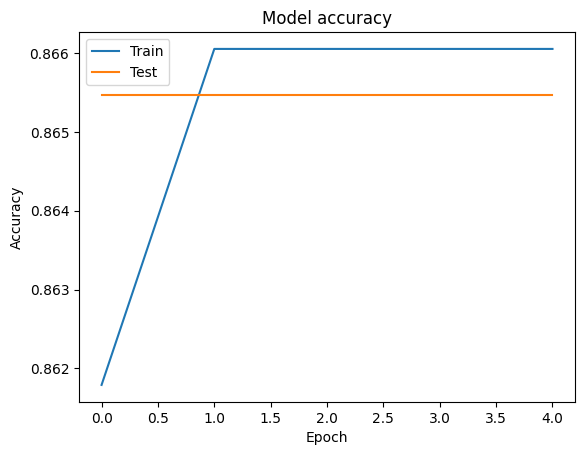

In [14]:
#Evaluate the Model:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


 Calculate Evaluation Metrics

In [10]:
# Make predictions
y_pred_prob = model.predict(X_test)  # Get predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)



35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 273ms/step


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)  # Use probabilities for ROC-AUC

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')


Accuracy: 0.87
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC AUC: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.87
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
ROC AUC: 0.50


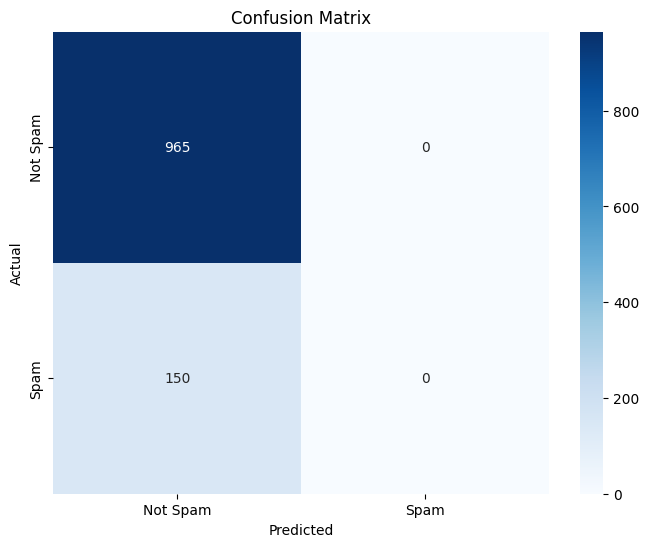

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
